For each of the following questions, formulate a null and alternative hypothesis 
(be as specific as you can be), then give an example of what a true positive, 
true negative, type I and type II errors would look like. Note that some of 
the questions are intentionally phrased in a vague way. It is your job to reword 
these as more precise questions that could be tested.


1
Has the network latency gone up since we switched internet service providers?

H0 = the network latency has not gone up since we switched ISP
H1 = the network latency has gone up since we switched ISP

True positive:
the network latency has increased, and our test also says that the latency has increased

True negative:
the network latency has not increased, and our test also says that the latency has not increased

Type I error = false positive:
the network latency has not increased, but our test says that the latency has increased

Type II error = false negative:
the network latency has increased, but our test says that the latency has not increased

2
Is the website redesign any good?

H0 = the website redesign is good
H1 = the website redesign is not good

True positive:
the website redesign is not good, and our test says that the website redesign is not good

True negative:
the website redesign is good, and our test says that the website redesign is good

Type I error = false positive:
the website redesign is good, and our test says that the website redesign is not good

Type II error = false negative:
the website redesign is not good, and our test says that the website redesign is good


3
Is our television ad driving more sales?

H0 = the television ad is not driving more sales
H1 = the television ad is driving more sales

True positive:
the television ad is driving more sales, and our test says that the television ad is driving more sales

True negative:
the television ad is not driving more sales, and our test says that the television ad is not driving more sales

Type I error = false positive:
the television ad is not driving more sales, and our test says that the television ad is driving more sales

Type II error = false negative:
the television ad is driving more sales, and our test says that the television ad is not driving more sales

In [13]:
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from pydataset import data

4
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.

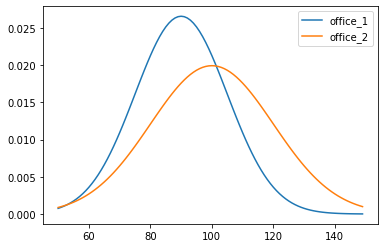

In [11]:
#4
# we are comparing the average time it takes each group to make a sale

# o1 = 40 sales in 90 +- 15 days
# o2 = 50 sales in 100 +- 20 days

x = np.arange(50, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'office_1')
plt.plot(x, y2, label = 'office_2')

plt.legend()

In [10]:
#4
# H0: the time to sell at o1 is = to the time at o2
# H1: the time to sell at o1 is != to the time at o2
alpha = 0.05

mu1 = 90
sd1 = 15
n1 = 40

mu2 = 100
sd2 = 20
n2 = 50

t, p = stats.ttest_ind_from_stats(mu1, sd1, n1, mu2, sd2, n2, equal_var = False)
t, p, alpha
# negative t stat indicates that office 1 has lower mean than office 2

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [18]:
#5
# Load the mpg dataset and use it to answer the following questions:

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [16]:
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [20]:
df['avg_eff'] = stats.hmean(df[['cty', 'hwy']], axis = 1)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [21]:
cars_2008 = df[df.year == 2008].avg_eff
cars_2008.head()

3     24.313725
4     24.705882
7     21.600000
10    23.333333
11    22.304348
Name: avg_eff, dtype: float64

In [22]:
cars_1999 = df[df.year == 1999].avg_eff
cars_1999.head()

1    22.212766
2    24.360000
5    19.809524
6    21.272727
8    21.272727
Name: avg_eff, dtype: float64

<AxesSubplot:>

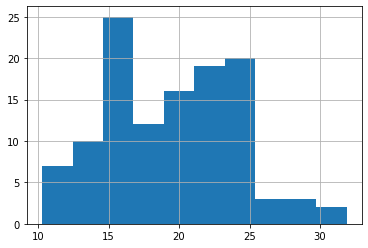

In [23]:
cars_2008.hist()

<AxesSubplot:>

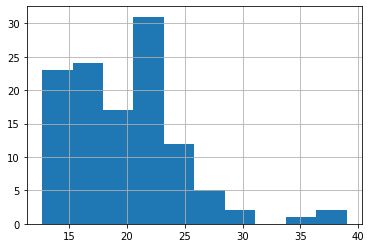

In [24]:
cars_1999.hist()

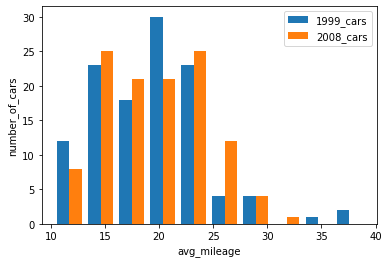

In [25]:
plt.hist([cars_1999, cars_2008], label = ['1999_cars', '2008_cars'])
plt.xlabel('avg_mileage')
plt.ylabel('number_of_cars')
plt.legend()

In [26]:
# H0: 1999 and 2008 cars have = mileage
# H1: 1999 and 2008 cars have != mileage

cars_1999.var(), cars_2008.var()

(25.850396545865912, 22.550836772260343)

In [27]:
stats.levene(cars_1999, cars_2008)
# tests shows that variance is homogeneous

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [28]:
#5
alpha = 0.05
t, p = stats.ttest_ind(cars_1999, cars_2008)
t, p, alpha

# p is not < 0.05
# we accept H0
# mileage is the same

(0.3011962975077886, 0.7635345888327115, 0.05)

<AxesSubplot:>

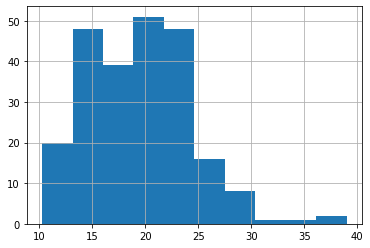

In [34]:
#5
# Are compact cars more fuel-efficient than the average car?

#df['is_compact'] = df['class'] == 'compact'

all_cars = df.avg_eff
all_cars.hist()

<AxesSubplot:>

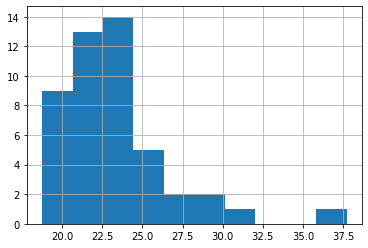

In [33]:
compact_cars = df[df['class'] == 'compact'].avg_eff
compact_cars.hist()
# not normal distribution

In [46]:
len(all_cars), len(compact_cars)

(234, 47)

In [36]:
#5
# H0: compact cars are not more fuel efficient than other cars
# H1: compact cars are more fuel efficient than other cars
# Use 1-sided t-test
alpha = 0.05
t, p = stats.ttest_ind(compact_cars, all_cars)
t, p/2, alpha
# t and p values show that we should reject H0
# compact cars are more fuel efficient than other cars

(5.193903224387407, 1.9888764369810984e-07, 0.05)

In [39]:
#5
# Do manual cars get better gas mileage than automatic cars?
df['transmission'] = np.where(df.trans.str.contains('auto'), 'auto', 'manual')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff,is_compact,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,True,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,True,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,True,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,True,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,True,auto


In [42]:
df.groupby('transmission').avg_eff.mean()

transmission
auto      18.583200
manual    21.629229
Name: avg_eff, dtype: float64

<AxesSubplot:xlabel='transmission'>

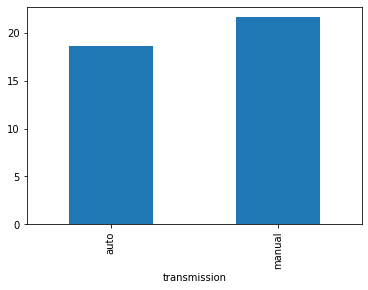

In [43]:
df.groupby('transmission').avg_eff.mean().plot.bar()

<AxesSubplot:>

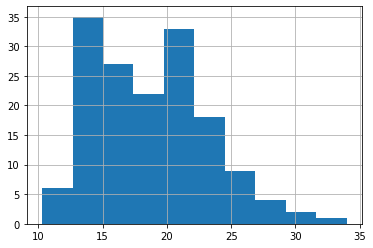

In [47]:
#5
# H0: manual cars do not get better mileage than other cars
# H1: manual cars do get better mileage than other cars
# 1-tailed t-test is needed

auto_cars = df[df['trans'].str.contains('auto')].avg_eff
auto_cars.hist()

<AxesSubplot:>

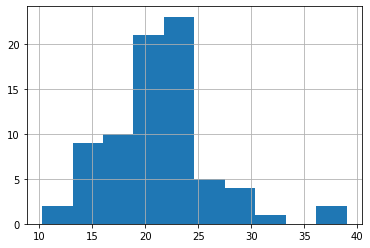

In [49]:
man_cars = df[df['trans'].str.contains('manual')].avg_eff
man_cars.hist()

In [52]:
len(man_cars), len(auto_cars)

(77, 157)

In [53]:
man_cars.var(), auto_cars.var()

(25.665633639828275, 20.428279095002054)

In [54]:
stats.levene(man_cars, auto_cars)
# p values shows that variances are not significantly different

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [55]:
alpha = 0.05
t, p = stats.ttest_ind(man_cars, auto_cars)
t, p/2, alpha

(4.652577547151351, 2.7552323050220026e-06, 0.05)

In [58]:
print('is p/2 < alpha?', p/2 < alpha)
print('is t > 0?', t > 0)

is p/2 < alpha? True
is t > 0? True


In [59]:
if (p/2 < alpha) & (t > 0):
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis
